# Task


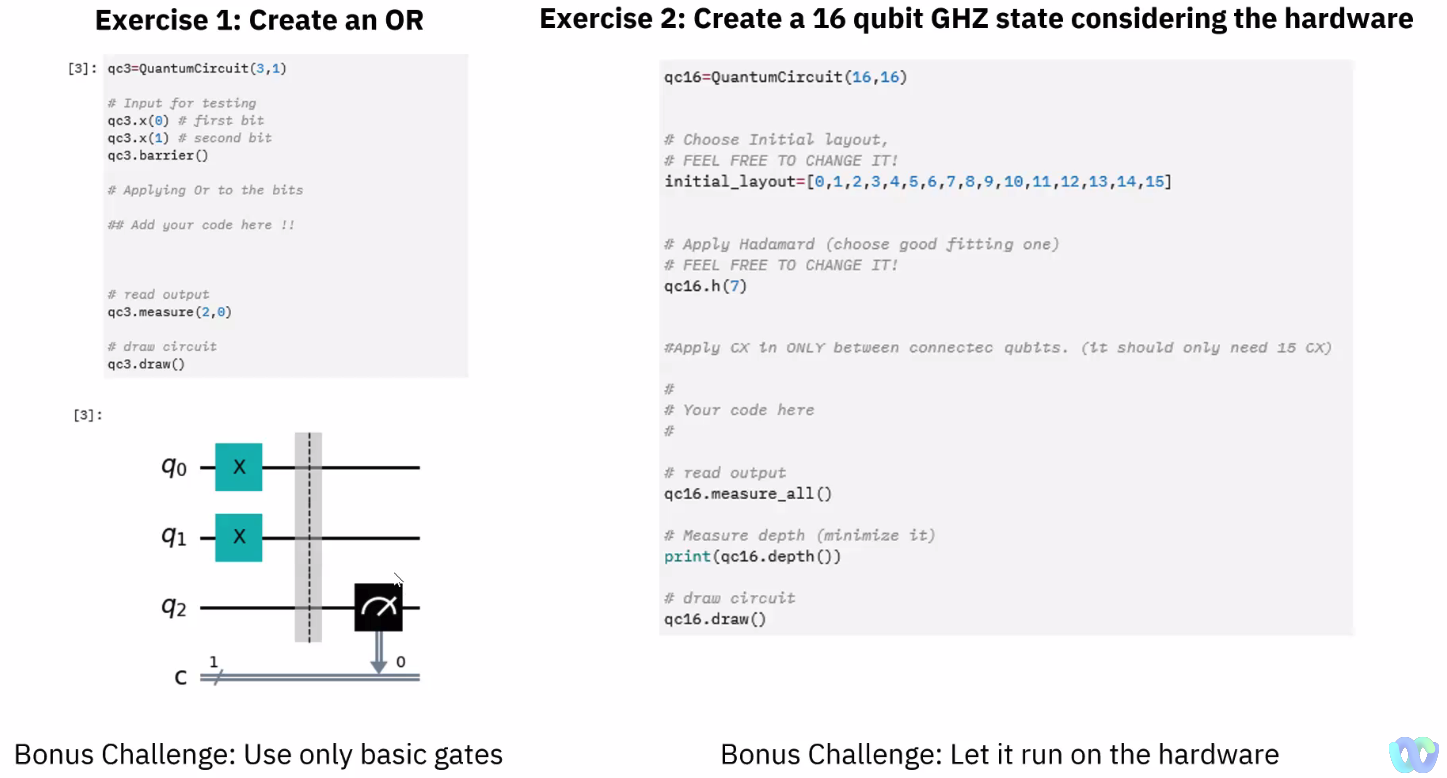

## Task 1 :  Create an OR Circuit

┌───┐        
     qbit_0: ┤ X ├──■─────
             ├───┤  │     
     qbit_1: ┤ X ├──■─────
             └─░─┘┌─┴─┐┌─┐
     qbit_2: ──░──┤ X ├┤M├
               ░  └───┘└╥┘
class_reg: 1/═══════════╩═
                        0

Depth of the circuit = 3


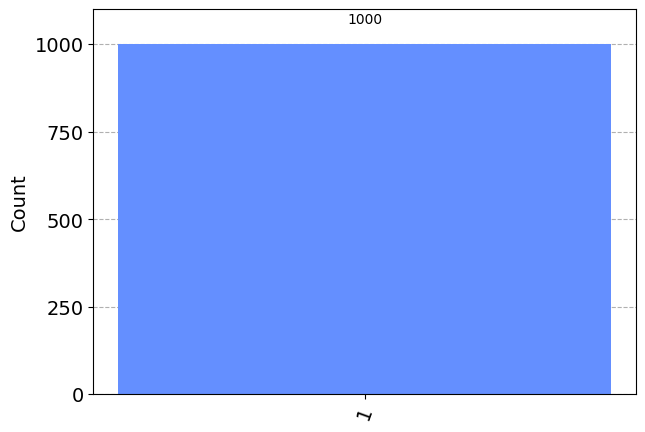

In [187]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from numpy import pi
from qiskit.visualization import plot_histogram

qr = QuantumRegister(3,'qbit')  #Getting 3 qbits
cr = ClassicalRegister(1,'class_reg')  #Getting 1 classical bits
qc = QuantumCircuit(qr,cr)

qc.x(qr[0])
qc.x(qr[1])
qc.barrier(qr[2])


qc.ccx(qr[0],qr[1],qr[2]) # The convention is: if (control-0 and control-1 ) == |1> then |q2> = flips 



qc.measure(qr[2], cr[0])
display(qc.draw())


backend = Aer.get_backend('qasm_simulator')
count = execute(qc, backend,shots=1000).result().get_counts()
print(f'Depth of the circuit = {qc.depth()}')
plot_histogram(count)


## Task 2 :  Create a 16qbits GHZ state considering the hardware

**primitive method**

┌───┐                                                                 »
 qbit_0: ┤ H ├──■──────────────────────────────────────────────────────────────»
         └───┘┌─┴─┐                                                            »
 qbit_1: ─────┤ X ├──■─────────────────────────────────────────────────────────»
              └───┘┌─┴─┐                                                       »
 qbit_2: ──────────┤ X ├──■────────────────────────────────────────────────────»
                   └───┘┌─┴─┐                                                  »
 qbit_3: ───────────────┤ X ├──■───────────────────────────────────────────────»
                        └───┘┌─┴─┐                                             »
 qbit_4: ────────────────────┤ X ├──■──────────────────────────────────────────»
                             └───┘┌─┴─┐                                        »
 qbit_5: ─────────────────────────┤ X ├──■─────────────────────────────────────»
                                  └───┘┌─┴─┐                                   »
 qbit_6: ──────────────────────────────┤ X ├──■────────────────────────────────»
                                       └───┘┌─┴─┐                              »
 qbit_7: ───────────────────────────────────┤ X ├──■───────────────────────────»
                                            └───┘┌─┴─┐                         »
 qbit_8: ────────────────────────────────────────┤ X ├──■──────────────────────»
                                                 └───┘┌─┴─┐                    »
 qbit_9: ─────────────────────────────────────────────┤ X ├──■─────────────────»
                                                      └───┘┌─┴─┐               »
qbit_10: ──────────────────────────────────────────────────┤ X ├──■────────────»
                                                           └───┘┌─┴─┐          »
qbit_11: ───────────────────────────────────────────────────────┤ X ├──■───────»
                                                                └───┘┌─┴─┐     »
qbit_12: ────────────────────────────────────────────────────────────┤ X ├──■──»
                                                                     └───┘┌─┴─┐»
qbit_13: ─────────────────────────────────────────────────────────────────┤ X ├»
                                                                          └───┘»
qbit_14: ──────────────────────────────────────────────────────────────────────»
                                                                               »
qbit_15: ──────────────────────────────────────────────────────────────────────»
                                                                               »
  cr: 16/══════════════════════════════════════════════════════════════════════»
                                                                               »
meas: 16/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                    ░       ░ ┌─┐                                             
« qbit_0: ───────────░───────░─┤M├─────────────────────────────────────────────
«                    ░ ┌───┐ ░ └╥┘┌─┐                                          
« qbit_1: ───────────░─┤ X ├─░──╫─┤M├──────────────────────────────────────────
«                    ░ └───┘ ░  ║ └╥┘┌─┐                                       
« qbit_2: ───────────░───────░──╫──╫─┤M├───────────────────────────────────────
«                    ░ ┌───┐ ░  ║  ║ └╥┘┌─┐                                    
« qbit_3: ───────────░─┤ X ├─░──╫──╫──╫─┤M├────────────────────────────────────
«                    ░ └───┘ ░  ║  ║  ║ └╥┘┌─┐                                 
« qbit_4: ───────────░───────░──╫──╫──╫──╫─┤M├─────────────────────────────────
«                    ░ ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐                              
« qbit_5: ───────────░─┤ X ├─░──╫──╫──╫──╫──╫─┤M├──────────────────────────────
«                    ░ └───┘ ░  ║  ║  ║  ║  ║ └╥┘┌─┐

Depth of the circuit = 18


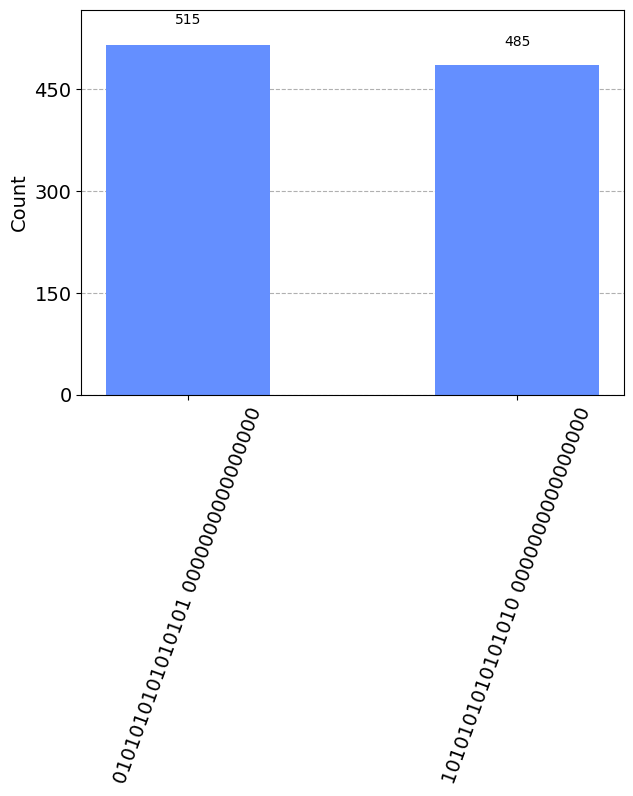

In [185]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from numpy import pi
from qiskit.visualization import plot_histogram

nq   =16
qr = QuantumRegister(nq,'qbit')

cr = ClassicalRegister(nq,'cr')

qc = QuantumCircuit(qr,cr)

#choosing the layout
initial_layout = range(nq)

qc.h(qr[0])

[qc.cx(i-1,i)    for i in range(1,nq)];
qc.barrier()
[qc.x(qr[i]) for i in range(1,nq,2)]

qc.draw()
qc.measure_all()
display(qc.draw())


backend = Aer.get_backend('qasm_simulator')
count = execute(qc, backend,shots=1000).result().get_counts()
print(f'Depth of the circuit = {qc.depth()}')
plot_histogram(count)


# Final answer

┌───┐ ░                                     ░       ░ ┌─┐            »
 qbit_0: ┤ H ├─░───■────■────■────■────■────■────■───░───■───░─┤M├────────────»
         ├───┤ ░   │    │    │    │    │    │    │   ░ ┌─┴─┐ ░ └╥┘┌─┐         »
 qbit_1: ┤ X ├─░───┼────┼────┼────┼────┼────┼────┼───░─┤ X ├─░──╫─┤M├─────────»
         └───┘ ░ ┌─┴─┐  │    │    │    │    │    │   ░ └───┘ ░  ║ └╥┘┌─┐      »
 qbit_2: ──────░─┤ X ├──┼────┼────┼────┼────┼────┼───░───■───░──╫──╫─┤M├──────»
         ┌───┐ ░ └───┘  │    │    │    │    │    │   ░ ┌─┴─┐ ░  ║  ║ └╥┘┌─┐   »
 qbit_3: ┤ X ├─░────────┼────┼────┼────┼────┼────┼───░─┤ X ├─░──╫──╫──╫─┤M├───»
         └───┘ ░      ┌─┴─┐  │    │    │    │    │   ░ └───┘ ░  ║  ║  ║ └╥┘┌─┐»
 qbit_4: ──────░──────┤ X ├──┼────┼────┼────┼────┼───░───■───░──╫──╫──╫──╫─┤M├»
         ┌───┐ ░      └───┘  │    │    │    │    │   ░ ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘»
 qbit_5: ┤ X ├─░─────────────┼────┼────┼────┼────┼───░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░           ┌─┴─┐  │    │    │    │   ░ └───┘ ░  ║  ║  ║  ║  ║ »
 qbit_6: ──────░───────────┤ X ├──┼────┼────┼────┼───░───■───░──╫──╫──╫──╫──╫─»
         ┌───┐ ░           └───┘  │    │    │    │   ░ ┌─┴─┐ ░  ║  ║  ║  ║  ║ »
 qbit_7: ┤ X ├─░──────────────────┼────┼────┼────┼───░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░                ┌─┴─┐  │    │    │   ░ └───┘ ░  ║  ║  ║  ║  ║ »
 qbit_8: ──────░────────────────┤ X ├──┼────┼────┼───░───■───░──╫──╫──╫──╫──╫─»
         ┌───┐ ░                └───┘  │    │    │   ░ ┌─┴─┐ ░  ║  ║  ║  ║  ║ »
 qbit_9: ┤ X ├─░───────────────────────┼────┼────┼───░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░                     ┌─┴─┐  │    │   ░ └───┘ ░  ║  ║  ║  ║  ║ »
qbit_10: ──────░─────────────────────┤ X ├──┼────┼───░───■───░──╫──╫──╫──╫──╫─»
         ┌───┐ ░                     └───┘  │    │   ░ ┌─┴─┐ ░  ║  ║  ║  ║  ║ »
qbit_11: ┤ X ├─░────────────────────────────┼────┼───░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░                          ┌─┴─┐  │   ░ └───┘ ░  ║  ║  ║  ║  ║ »
qbit_12: ──────░──────────────────────────┤ X ├──┼───░───■───░──╫──╫──╫──╫──╫─»
         ┌───┐ ░                          └───┘  │   ░ ┌─┴─┐ ░  ║  ║  ║  ║  ║ »
qbit_13: ┤ X ├─░─────────────────────────────────┼───░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░                               ┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║ »
qbit_14: ──────░───────────────────────────────┤ X ├─░───■───░──╫──╫──╫──╫──╫─»
         ┌───┐ ░                               └───┘ ░ ┌─┴─┐ ░  ║  ║  ║  ║  ║ »
qbit_15: ┤ X ├─░─────────────────────────────────────░─┤ X ├─░──╫──╫──╫──╫──╫─»
         └───┘ ░                                     ░ └───┘ ░  ║  ║  ║  ║  ║ »
  cr: 16/═══════════════════════════════════════════════════════╬══╬══╬══╬══╬═»
                                                                ║  ║  ║  ║  ║ »
meas: 16/═══════════════════════════════════════════════════════╩══╩══╩══╩══╩═»
                                                                0  1  2  3  4 »
«                                          
« qbit_0: ─────────────────────────────────
«                                          
« qbit_1: ─────────────────────────────────
«                                          
« qbit_2: ─────────────────────────────────
«                                          
« qbit_3: ─────────────────────────────────
«                                          
« qbit_4: ─────────────────────────────────
«         ┌─┐                              
« qbit_5: ┤M├──────────────────────────────
«         └╥┘┌─┐                           
« qbit_6: ─╫─┤M├───────────────────────────
«          ║ └╥┘┌─┐                        
« qbit_7: ─╫──╫─┤M├────────────────────────
«          ║  ║ └╥┘┌─┐                     
« qbit_8: ─╫──╫──╫─┤M├─────────────────────
«          ║  ║  ║ └╥┘┌─┐                  
« qbit_9: ─╫──╫──╫──╫─┤M├──────────────────
«          ║  ║  ║  ║ └╥┘┌─┐               
«qbit_10: ─╫──╫──╫──╫──╫─┤M├───────────────
«          ║  ║  ║  ║  ║ └╥┘┌─┐            
«qbit_11: ─╫──╫──╫──╫──╫──╫─┤M├──────

Depth of the circuit = 10


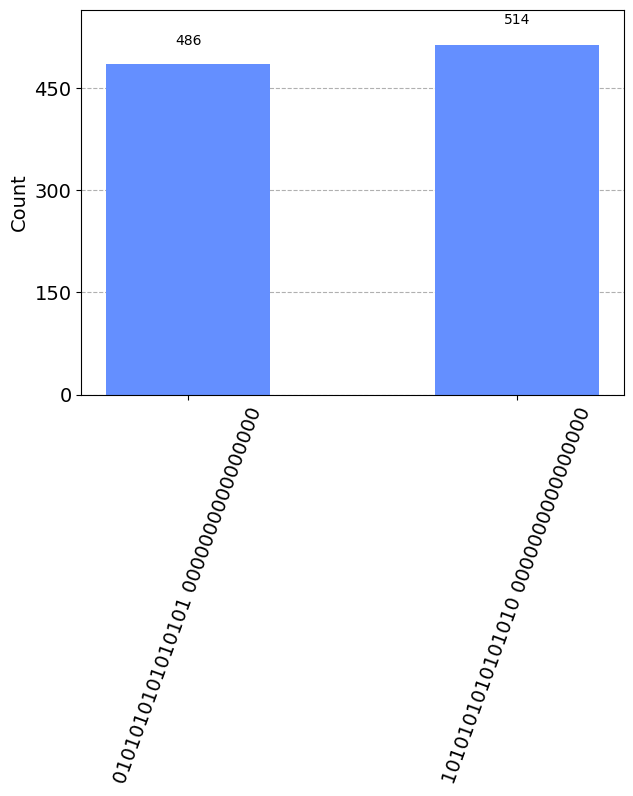

In [186]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from numpy import pi
from qiskit.visualization import plot_histogram

nq = 16
qr = QuantumRegister(nq,'qbit')

cr = ClassicalRegister(nq,'cr')

qc = QuantumCircuit(qr,cr)

#choosing the layout
initial_layout = range(nq)


qc.h(qr[0])
for i in range(0,nq,2):
    qc.x(qr[i+1])
qc.barrier()

for i in range(2,nq,2):
    qc.cx(qr[0],qr[i])
qc.barrier()
for i in range(2,nq,2) :
    if i == 2:
        # qc.barrier()
        # qc.cx(qr[0],qr[i])
        qc.cx(qr[i-2], qr[i-1])
        qc.cx(qr[i], qr[i+1])
    else:
        qc.cx(qr[i], qr[i+1])
    
qc.draw()

qc.measure_all()
display(qc.draw())


backend = Aer.get_backend('qasm_simulator')
count = execute(qc, backend,shots=1000).result().get_counts()
print(f'Depth of the circuit = {qc.depth()}')
plot_histogram(count)